In [47]:
import pandas as pd
import numpy as np
from module.TOPSIS import TOPSIS

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [48]:
df_top = pd.read_csv('./resource/imput_topsis.csv')
df_top.head()

,col,typevalue,usenull,p_null,p_unique,p_max_row_class
0,id,1.0,1.0,0.000000,1.000000,0.000005
1,order_number,4.0,1.0,0.000000,1.000000,0.000005
2,company_id,1.0,1.0,0.000000,0.000010,0.999959
3,area_id,1.0,1.0,0.000000,0.000067,0.245356
4,first_loc_id,1.0,1.0,0.026087,0.000653,0.113308


In [58]:
df_top.shape

(84, 6)

In [49]:
cols_criterias = ['typevalue','usenull','p_null',
                  'p_unique','p_max_row_class']
matrix = np.array(df_top[[*cols_criterias]])

Alternatives = df_top.col.values

w = np.array([0.3, 0.175, 0.175, 0.175, 0.175])

# 1 - Minimaze 0 - Maximaze
cb = np.array([1, 0, 1, 1, 1])

B = TOPSIS (matrix, w, cb)
B.normalizeMatrix()
B.introWeights()
B.getIdealSolutions()
B.distanceToIdeal()
B.relativeCloseness()

result = list(zip(Alternatives,B.rCloseness))
df_result = pd.DataFrame(result,columns=['alternative',
                                         'rank'])

In [50]:
df_solution = pd.DataFrame([['Positive',*B.idealPos],
                            ['Negative',*B.idealNeg]],
                           columns=['Solution',*cols_criterias])
df_solution.head()

,Solution,typevalue,usenull,p_null,p_unique,p_max_row_class
0,Positive,0.01174,0.019094,0.000000,7.836251e-07,2.779137e-07
1,Negative,0.05870,0.019094,0.026692,7.562179e-02,5.363652e-02


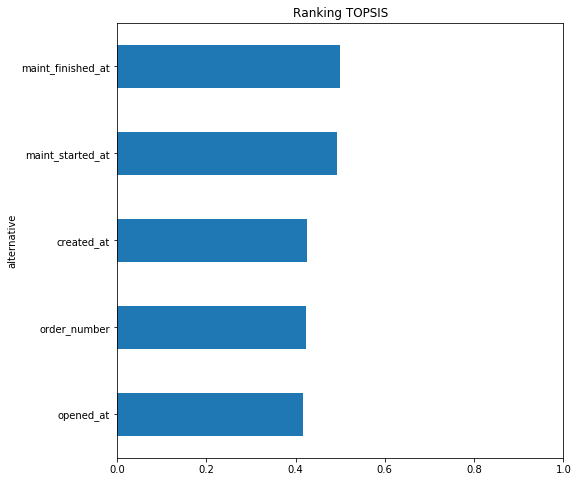

In [51]:
# Graph plot
df_result = df_result.sort_values(by=['rank'],ascending=True)
df_result = df_result.reset_index().drop('index',axis=1)
df_result[:5].plot(x='alternative', y='rank', kind='barh',
                   figsize=(8,8),xlim=(0,1),
                   title='Ranking TOPSIS',legend=False)

In [52]:
df_result.head()

,alternative,rank
0,opened_at,0.416833
1,order_number,0.422578
2,created_at,0.426083
3,maint_started_at,0.494052
4,maint_finished_at,0.500592


In [53]:
df_full = pd.merge(df_top,df_result, left_on='col', right_on='alternative', how='left')
df_full = df_full.drop('alternative',axis= 1 )
df_full = df_full.rename(columns={'rank':'rank_topsis'})

In [54]:
df_show = df_full.sort_values(by=['rank_topsis'],ascending=False).reset_index().drop('index',axis=1)

In [57]:
df_full.sort_values(by=['rank_topsis'],ascending=True).reset_index().drop('index',axis=1)

,col,typevalue,usenull,p_null,p_unique,p_max_row_class,rank_topsis
0,opened_at,5.0,1.0,0.000000,0.923577,0.000689,0.416833
1,order_number,4.0,1.0,0.000000,1.000000,0.000005,0.422578
2,created_at,5.0,1.0,0.000000,0.864698,0.021279,0.426083
3,maint_started_at,5.0,1.0,0.202414,0.613575,0.000114,0.494052
4,maint_finished_at,5.0,1.0,0.206549,0.593482,0.000088,0.500592
5,id,1.0,1.0,0.000000,1.000000,0.000005,0.501650
6,closed_at,5.0,1.0,0.215777,0.531116,0.000130,0.521412
7,description,4.0,1.0,0.000000,0.570374,0.007243,0.552874
8,executed_service_historic,4.0,1.0,0.403471,0.506578,0.006274,0.561342
9,performed_asset_downtime,3.0,1.0,0.000000,0.004912,0.966234,0.593994


In [ ]:
# df_show.to_csv('./resource/output_topsis.csv', index=False)

In [ ]:
# print(df_show.to_string(index=False))

In [ ]:
# df_show